# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+-', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 82.2 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,NaN,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30.0,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,NaN,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18.0,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22.0,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)
    df.agewed.replace([98, 99, 0], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

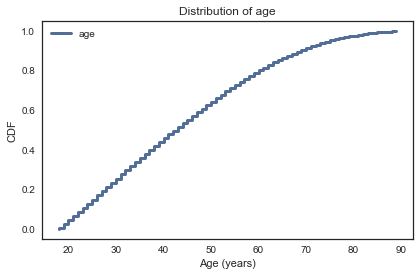

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: The normal distribution does not appear to be a good model for the age dataset. Below the 50th percentile, there is discrepancy between the data and the model; there are younger people than we would expect in a normal distribution. Above the 75th percentile, there is another discrepancy between the data and the model; there are older people than we would expect in a normal distribution. Around the median, the data and model seems to fit each other the best. 

n, mean, std 62281 44.47905368874617 16.482037485675978


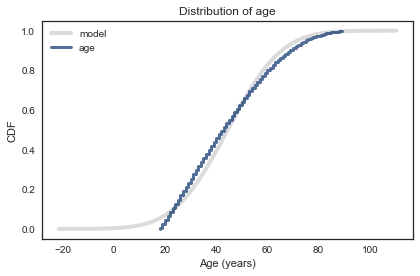

In [8]:
MakeNormalModel(gss.age.dropna(), label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: The age curve matches the model near the mean and deviates in the tails. The oldest respondents are younger than what the model expects, and the youngest respondents are older than what the model expects (probably since there can't be any negative ages and young children aren't typical respondents). The normal model may describe the age distribution well within 1-2 standard deviations from the mean.

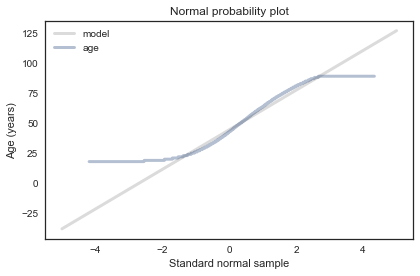

In [9]:
MakeNormalPlot(gss.age.dropna(), label='age')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The complementary CDF of ages does not appear very straight, indicating that the exponential distribution may not be the best model for this data. 

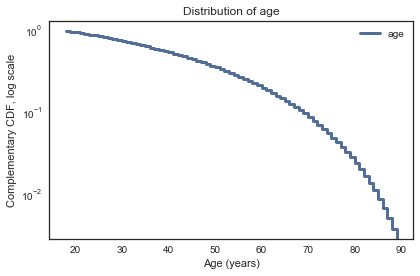

In [10]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: The CDF of ages on a log-x scale appears to have a shallow sigmoid shape, which may indicate a lognormal distribution. 

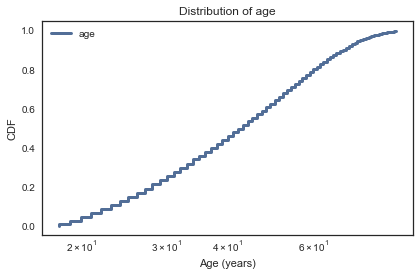

In [11]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: The lognormal model appears to be a very slightly better fit compared to the normal model (though the difference is very small). Above the 50th percentile, there is discrepancy between the data and the model; there are older people than we would expect in a lognormal distribution. Below the 50th percentile, there is discrepancy between the data and the model; there are younger people than we would expect in a lognormal distribution. Around the median and slightly lower, the data and model seems to fit each other the best.

n, mean, std 62281 1.6168744157503179 0.1678791432891677


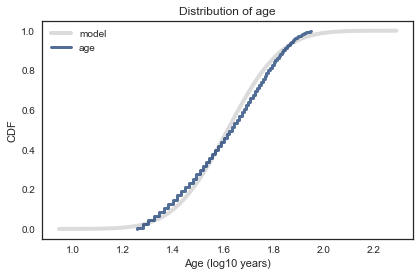

In [12]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: The age curve matches the lognormal model near the mean and deviates in the tails. The oldest respondents are younger than what the model expects, and the youngest respondents are older than what the model expects. The lognormal model may describe the age distribution well within 1-2 standard deviations from the mean. However,  comparing it with the normal probability plot without log-x, it seems like the normal model is better for values greater than the mean, while the lognormal model is better for values less than the mean. 

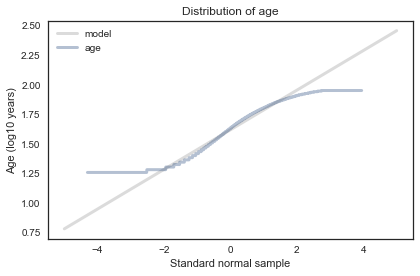

In [13]:
MakeNormalPlot(values, label='age')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: The complementary CDF of ages on a log-log scale does not appear very straight, indicating that the Pareto distribution may not be the best model for this data.

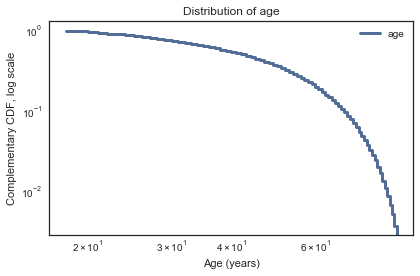

In [14]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: The complementary CDF of ages on a log-log scale (with 1-y being -ln(1-y)) does not appear very straight, indicating that the Weibull distribution may not be the best model for this data.

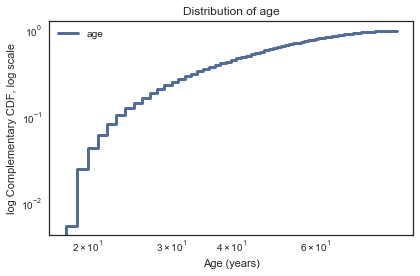

In [15]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

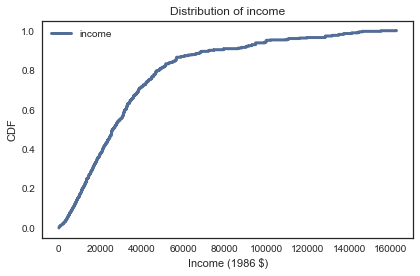

In [16]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

1) Here's the CDF of realinc compared to a normal distribution with the same mean and standard deviation.

Interpretation: The normal distribution does not appear to be a good model for the realinc dataset. Around the 50th percentile, there is discrepancy between the data and the model; there is lower income than we would expect in a normal distribution. This overestimation (from the model) continues until around the 80th percentile. Above the 80th percentile and below the 20th percentile, there seems to be higher incomes that we would expect in a normal distribution. Not partcicular part of the distribution does the data and model seem to fit nicely together, expect possibly around the 100th percentile. 

n, mean, std 55499 33882.52181307481 28502.895120969337


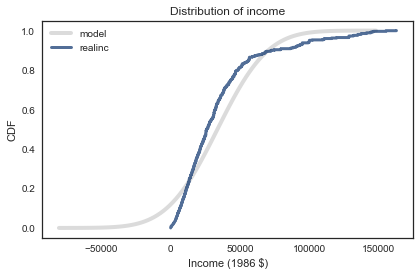

In [17]:
MakeNormalModel(gss.realinc.dropna(), label='realinc')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

Interpretation: The realinc curve matches the model best near the mean and deviates the most in the tails. The richest and poorest respondents are both richer than what the model expects. The normal model does not seem to describe the income distribution well at any income range, except potentially within 1 standard deviation from the mean. 

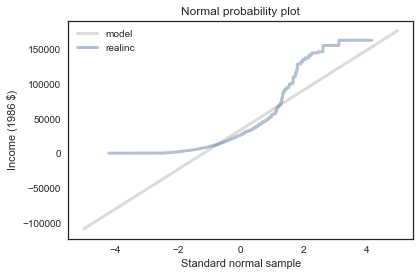

In [18]:
MakeNormalPlot(gss.realinc.dropna(), label='realinc')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income (1986 $)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The complementary CDF of income appears somewhat straight for incomes lower than 100,000. This may indicate that the exponential distribution may be a decent model for lower incomes. 

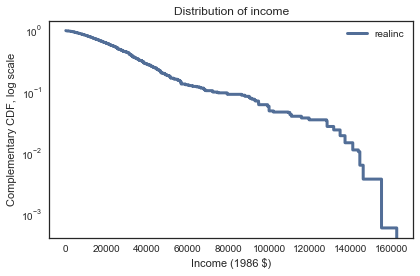

In [19]:
thinkplot.cdf(cdf_realinc, label='realinc', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

Interpretation: The CDF of incomes on a log-x scale appears to have a distinct sigmoid shape, which may indicate a lognormal distribution.

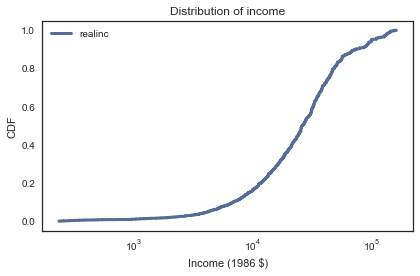

In [20]:
thinkplot.cdf(cdf_realinc, label='realinc')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

Interpretation: The lognormal model is a much better fit compared to the normal model. Around the 50th percentile, there is small discrepancy between the data and the model; there are higher incomes than we would expect in the lognormal distribution. The tails of the distribution also align with the model.  

n, mean, std 55499 4.381031736514132 0.3856600273208647


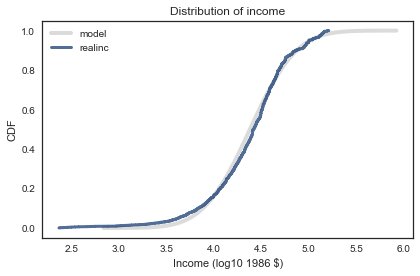

In [21]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='realinc')

decorate(title='Distribution of income', 
         xlabel='Income (log10 1986 $)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

Interpretation: The income curve matches the lognormal model near the mean and (surprisingly) deviates in the tails. The richest and poorest respondents are poorer than what the model expects, which is opposite from the observations in #2. The lognormal model would describe the income distribution well within 2 standard deviations from the mean.   

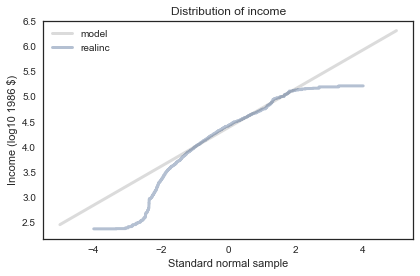

In [22]:
MakeNormalPlot(values, label='realinc')

decorate(title='Distribution of income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10 1986 $)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: The complementary CDF of incomes on a log-log scale does not appear very straight, indicating that the Pareto distribution may not be the best model for this data.

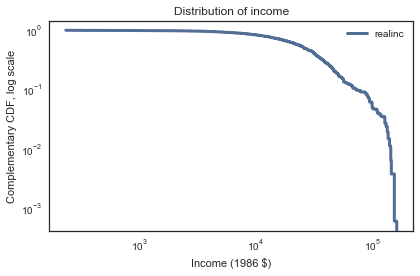

In [23]:
thinkplot.cdf(cdf_realinc, label='realinc', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation: The complementary CDF of ages on a log-log scale appears somewhat straight for higher incomes (above 1000). This may indicate that the the Weibull distribution may be a decent model for higher incomes. 

Overall, I would consider using the exponential model for the lower income tail, the lognormal model for the mid-range incomes, and the Weibull distribution model for the higher income tail. 

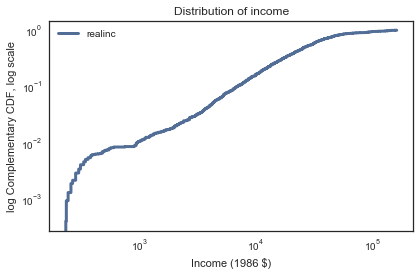

In [24]:
thinkplot.cdf(cdf_realinc, label='realinc', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [2]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

Wall time: 162 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

In [8]:
# Quiz stuff (please ignore):
heights = brfss['HTM4'] * 0.01
weights = brfss['WTKG3']
bmi = weights/(heights**2)
mean = bmi.mean()
stdev = bmi.std()
coefficient = stdev/mean
print(coefficient)

0.23025835012805929


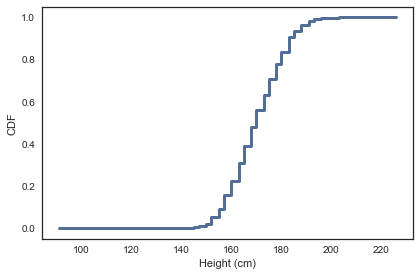

In [26]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [27]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

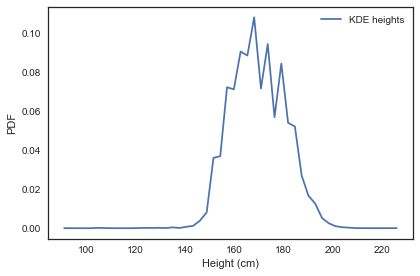

In [28]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

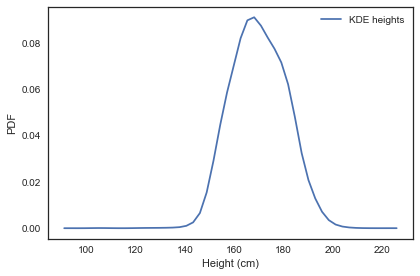

In [29]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [30]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191893)

Here's the model compared to the estimated PDF.

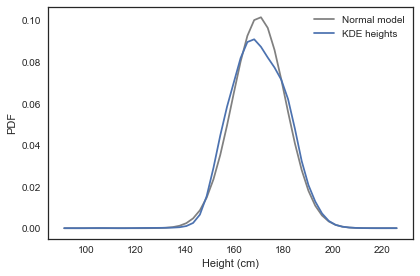

In [31]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

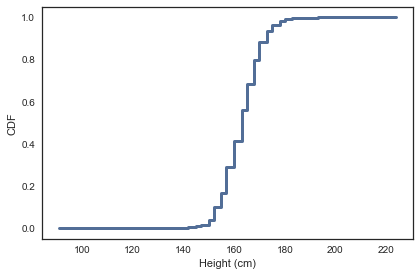

In [32]:
heights_women = brfss[brfss['SEX'] == 2].HTM4
cdf_heights_women = Cdf(heights_women)
thinkplot.Cdf(cdf_heights_women)

decorate(xlabel='Height (cm)', ylabel='CDF')

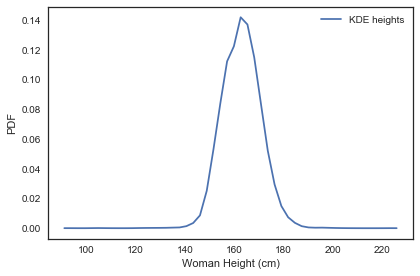

In [33]:
kde = gaussian_kde(heights_women.dropna(), bw_method=0.3)

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Woman Height (cm)', ylabel='PDF')

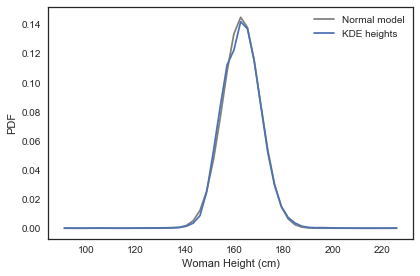

In [34]:
mean = heights_women.mean()
std = heights_women.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Woman Height (cm)', ylabel='PDF')

The women height data fits the normal model better. 

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

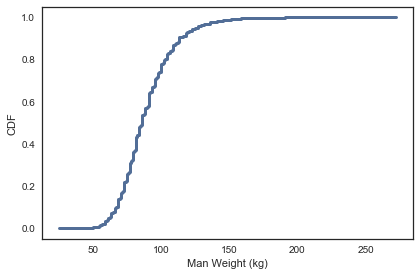

In [35]:
weights_men = brfss[brfss['SEX'] == 1].WTKG3
cdf_weights_men = Cdf(weights_men)
thinkplot.Cdf(cdf_weights_men)

decorate(xlabel='Man Weight (kg)', ylabel='CDF')

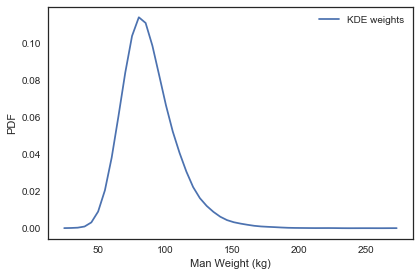

In [36]:
kde = gaussian_kde(weights_men.dropna(), bw_method=0.3)

xs = np.linspace(weights_men.min(), weights_men.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE weights')

decorate(xlabel='Man Weight (kg)', ylabel='PDF')

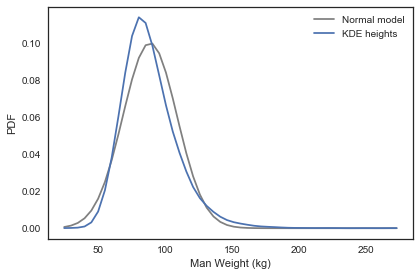

In [37]:
mean = weights_men.mean()
std = weights_men.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Man Weight (kg)', ylabel='PDF')

The normal model does not fit as well as it did for women heights.

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

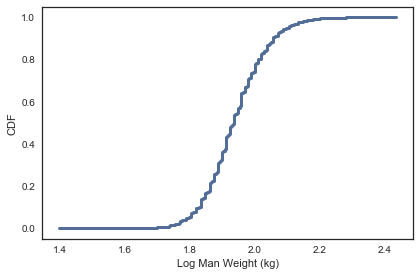

In [38]:
log_weights_men = np.log10(brfss[brfss['SEX'] == 1].WTKG3.dropna())
cdf_log_weights_men = Cdf(log_weights_men)
thinkplot.Cdf(cdf_log_weights_men)

decorate(xlabel='Log Man Weight (kg)', ylabel='CDF')

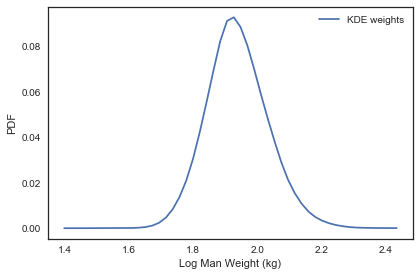

In [39]:
kde = gaussian_kde(log_weights_men, bw_method=0.3)

xs = np.linspace(log_weights_men.min(), log_weights_men.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE weights')

decorate(xlabel='Log Man Weight (kg)', ylabel='PDF')

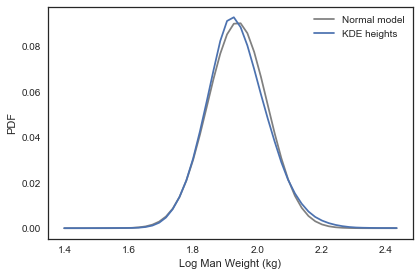

In [40]:
mean = log_weights_men.mean()
std = log_weights_men.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Log Man Weight (kg)', ylabel='PDF')

The normal model for the log of men weights fits better than it did for regular men weights. This may imply that the distribution of weights is lognormal.

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [41]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [42]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [43]:
male_weights.mean(), male_weights.median()

(88.83871202340993, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [44]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [45]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [46]:
female_weights.mean(), female_weights.median()

(73.62438714355793, 70.31)

Mean is higher than median, so distribution is skewed to the right.

In [47]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

Moment-based sample skewness for female weights is larger than for male weights, but in general moment-based sample skewness is not a great statistic since it is disproportionately impacted by outliers. 

In [48]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

The Pearson median skewness for female weights is higher than the Pearson median skewness for male weights, indicating that the female weight distribution is more skewed. 

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

I will be exploring the agewed variable from the GSS dataset again. I am curious to make sense of the distribution of agewed for males and females, just males, and just females.

1) For males and females...

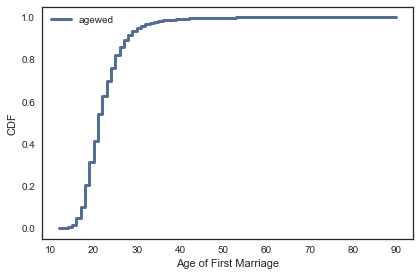

In [49]:
cdf_agewed = Cdf(gss['agewed'], label='agewed')
thinkplot.Cdf(cdf_agewed)
decorate(xlabel='Age of First Marriage', ylabel='CDF')

The CDF of agewed does not appear to be a sigmoid, so I do not think it is a normal distribution. I will take the log of agewed to determine if the distribution could be lognormal. 

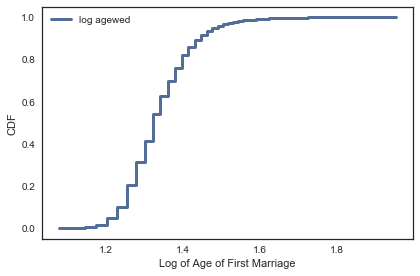

In [50]:
log_agewed = np.log10(gss['agewed'])
cdf_log_agewed = Cdf(log_agewed, label='log agewed')
thinkplot.Cdf(cdf_log_agewed)
decorate(xlabel='Log of Age of First Marriage', ylabel='CDF')

This looks slightly more like a sigmoid. I will do a normal probability plot to confirm whether the distribution appears to be lognormal.

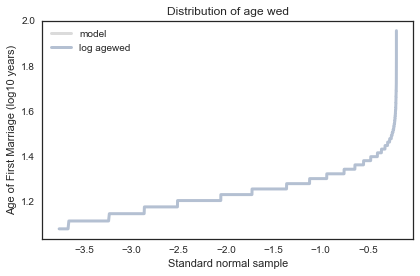

In [51]:
MakeNormalPlot(log_agewed, label='log agewed')

decorate(title='Distribution of age wed', 
         xlabel='Standard normal sample', 
         ylabel='Age of First Marriage (log10 years)')

It doesn't look like a straight line, so distribution of age wed isn't normal or lognormal. Next, I want to test whether the distribution is exponential by creating a CCDF.

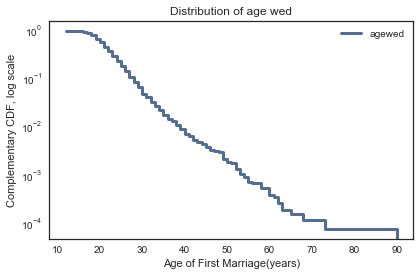

In [52]:
thinkplot.cdf(cdf_agewed, label='agewed', complement=True)

decorate(title='Distribution of age wed', 
         xlabel='Age of First Marriage(years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

The CCDF looks somewhat straight after the median. An exponential distribution may be suitable for older marriages. Just to get a complete picture, I will also look at the Pareto and Weibull distributions to see if they describe the data better. 

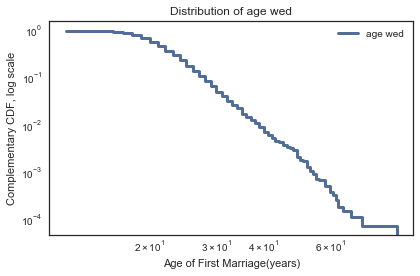

In [53]:
thinkplot.cdf(cdf_agewed, label='age wed', complement=True)

decorate(title='Distribution of age wed', 
         xlabel='Age of First Marriage(years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

The Pareto distribution may be slightly better than exponential, but it is hard to tell. 

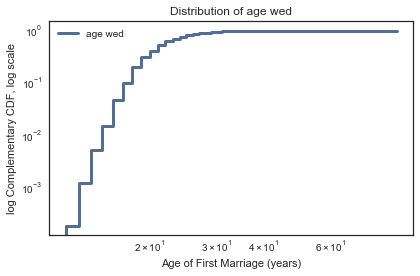

In [54]:
thinkplot.cdf(cdf_agewed, label='age wed', transform='Weibull')

decorate(title='Distribution of age wed', 
         xlabel='Age of First Marriage (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Weibull doesn't look straight. Overall, if I had to describe the distribution of age wed, I would say that it is exponential. However, none of the distributions really stood out. Now I will try it for women. 

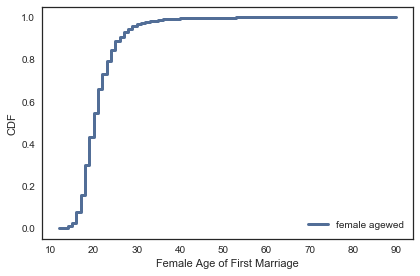

In [56]:
cdf_female_agewed = Cdf(gss[gss.sex==2].agewed, label='female agewed')
thinkplot.Cdf(cdf_female_agewed)
decorate(xlabel='Female Age of First Marriage', ylabel='CDF')

The distribution of female first marriage ages look very similar to the distribution for agewed for both genders. As a result, I will go straight to the CCDF. 

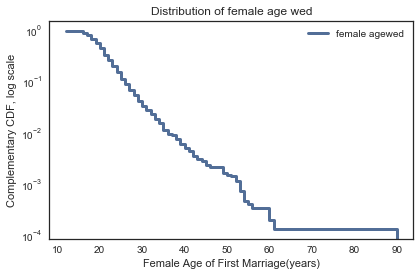

In [57]:
thinkplot.cdf(cdf_female_agewed, label='female agewed', complement=True)

decorate(title='Distribution of female age wed', 
         xlabel='Female Age of First Marriage(years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

Intrestingly, the straightness of the CCDF for female agewed seems to drop of around 60 years compared to around 73 years in the general CCDF. With the Pareto distribution...

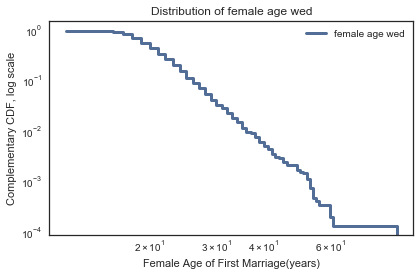

In [58]:
thinkplot.cdf(cdf_female_agewed, label='female age wed', complement=True)

decorate(title='Distribution of female age wed', 
         xlabel='Female Age of First Marriage(years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Similar conclusions can be drawn when comparing the CCDF on a log log scale. Overall, I would choose to model the distribution of female agewed with an exponential distribution. Now looking at the male agewed data...

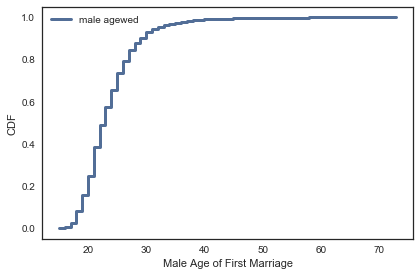

In [59]:
cdf_male_agewed = Cdf(gss[gss.sex==1].agewed, label='male agewed')
thinkplot.Cdf(cdf_male_agewed)
decorate(xlabel='Male Age of First Marriage', ylabel='CDF')

CDF looks very similar to the other CDFs. I would also guess that the distribution of male agewed is exponential. 

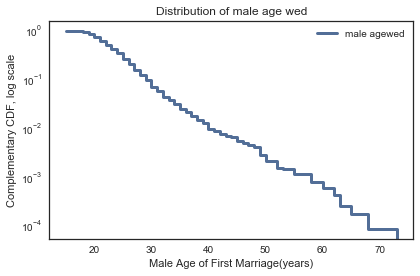

In [60]:
thinkplot.cdf(cdf_male_agewed, label='male agewed', complement=True)

decorate(title='Distribution of male age wed', 
         xlabel='Male Age of First Marriage(years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

The CCDF for male agewed looks straighter than the CCDF for female agewed. Near the median, there isn't as much of a plateau (possibly since the median of male agewed is higher than the median of female agewed). There also isn't the outlier at around 90 years old!  